In [ ]:
# Setup: Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/liver_cirrhosis.csv')

# Display top 5 rows to verify loading
df.head()


,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [ ]:
# Check basic info and null values
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

In [4]:
# Summary statistics of numerical columns
print(df.describe())

# Distribution of the target variable 'Stage'
print("\nStage class distribution:")
print(df['Stage'].value_counts())


             N_Days           Age     Bilirubin   Cholesterol       Albumin  \
count  25000.000000  25000.000000  25000.000000  25000.000000  25000.000000   
mean    1887.117040  18495.877080      3.402644    372.331471      3.486578   
std     1091.690918   3737.596616      4.707491    193.668452      0.380488   
min       41.000000   9598.000000      0.300000    120.000000      1.960000   
25%     1080.000000  15694.000000      0.800000    275.000000      3.290000   
50%     1680.000000  18499.000000      1.300000    369.510563      3.510000   
75%     2576.000000  20955.000000      3.400000    369.510563      3.750000   
max     4795.000000  28650.000000     28.000000   1775.000000      4.640000   

             Copper      Alk_Phos          SGOT  Tryglicerides     Platelets  \
count  25000.000000  25000.000000  25000.000000   25000.000000  25000.000000   
mean     100.184663   1995.675597    123.166345     123.822548    256.007337   
std       73.184840   1798.885660     47.747616 

In [5]:
# Convert categorical columns to dummy/indicator variables
categorical_cols = ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Show the new shape and first 5 rows after encoding
print(f"Data shape after encoding: {df_encoded.shape}")
df_encoded.head()


Data shape after encoding: (25000, 21)


,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,...,Stage,Status_CL,Status_D,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y,Edema_S,Edema_Y
0,2221,18499,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,...,1,False,False,True,False,False,True,False,False,False
1,1230,19724,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,...,2,False,False,True,True,True,False,True,False,False
2,4184,11839,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,...,2,False,False,True,False,False,False,False,False,False
3,2090,16467,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,...,2,False,True,True,False,False,False,False,False,False
4,2105,21699,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,...,1,False,True,True,False,False,True,False,False,False


In [6]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = df_encoded.drop('Stage', axis=1)
y = df_encoded['Stage']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of splits
print(f"Training set shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, Testing labels shape: {y_test.shape}")


Training set shape: (20000, 20), Training labels shape: (20000,)
Testing set shape: (5000, 20), Testing labels shape: (5000,)


              precision    recall  f1-score   support

           1       0.97      0.94      0.95      1657
           2       0.94      0.96      0.95      1697
           3       0.97      0.97      0.97      1646

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



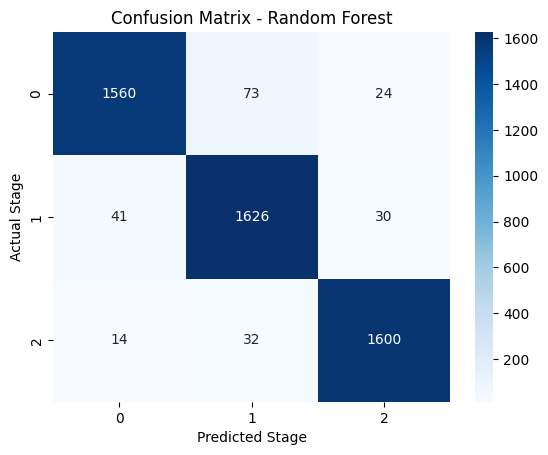

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on test data
y_pred = rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Stage')
plt.ylabel('Actual Stage')
plt.title('Confusion Matrix - Random Forest')
plt.show()


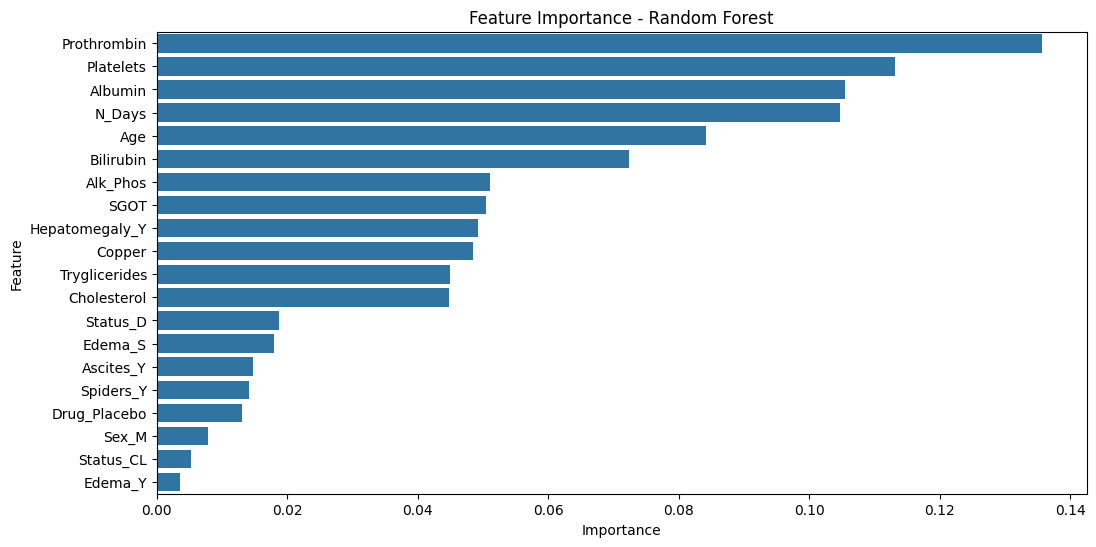

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feat_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best estimator
print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(bootstrap=False, min_samples_split=5, random_state=42)


              precision    recall  f1-score   support

           1       0.97      0.94      0.95      1657
           2       0.94      0.96      0.95      1697
           3       0.97      0.97      0.97      1646

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000



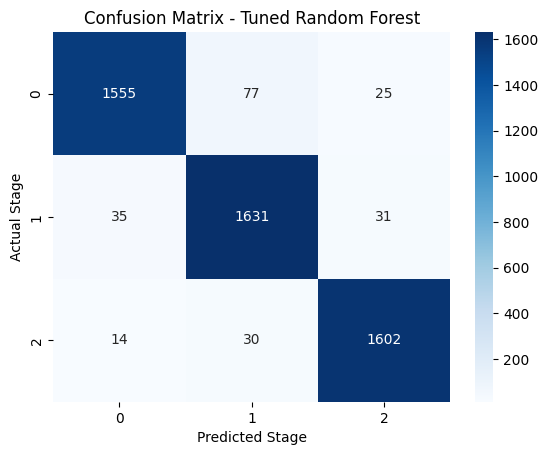

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the best model found by GridSearchCV
rf_best = RandomForestClassifier(
    bootstrap=False,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)
rf_best.fit(X_train, y_train)

# Evaluate the tuned model
y_pred_best = rf_best.predict(X_test)
print(classification_report(y_test, y_pred_best))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Stage")
plt.ylabel("Actual Stage")
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()


In [11]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Tuned RF model setup
rf_best = RandomForestClassifier(
    bootstrap=False,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=100,
    random_state=42
)

# 5-fold cross-validation on the entire dataset
cv_scores = cross_val_score(rf_best, X, y, cv=5, scoring='accuracy')

# Print the mean and std of cross-validation accuracy
print(f"5-Fold CV Accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")


5-Fold CV Accuracy: 0.9513 ± 0.0119


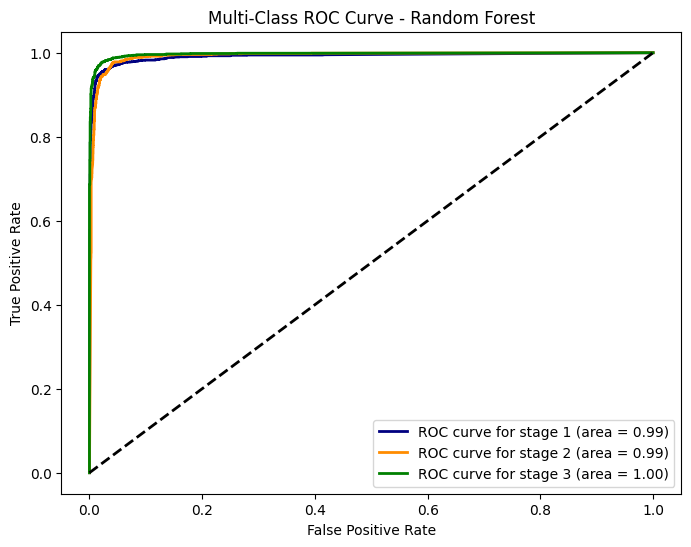

In [14]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from itertools import cycle

# Binarize the original target labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=[1, 2, 3])
n_classes = y_test_bin.shape[1]

# Wrap the tuned Random Forest in OneVsRestClassifier
classifier = OneVsRestClassifier(rf_best)
classifier.fit(X_train, y_train)

# Predict probabilities for each class
y_score = classifier.predict_proba(X_test)

# Calculate ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for all classes
colors = cycle(['navy', 'darkorange', 'green'])
plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve for stage {i + 1} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()


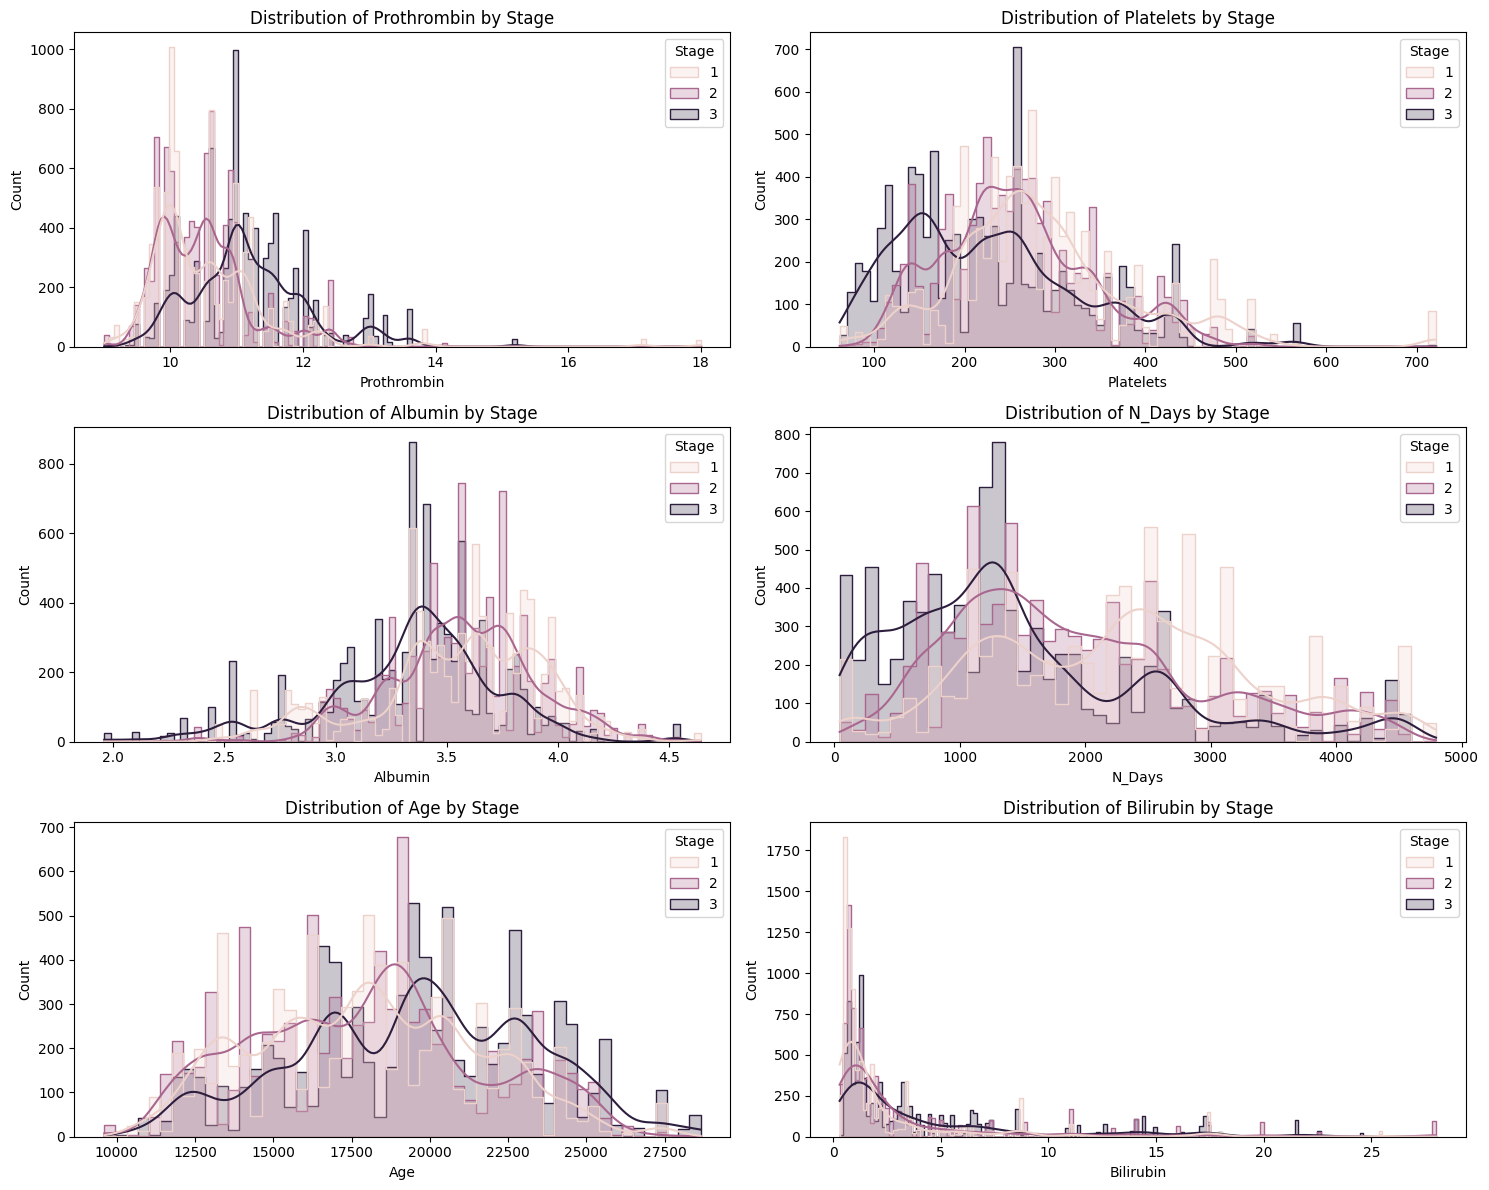

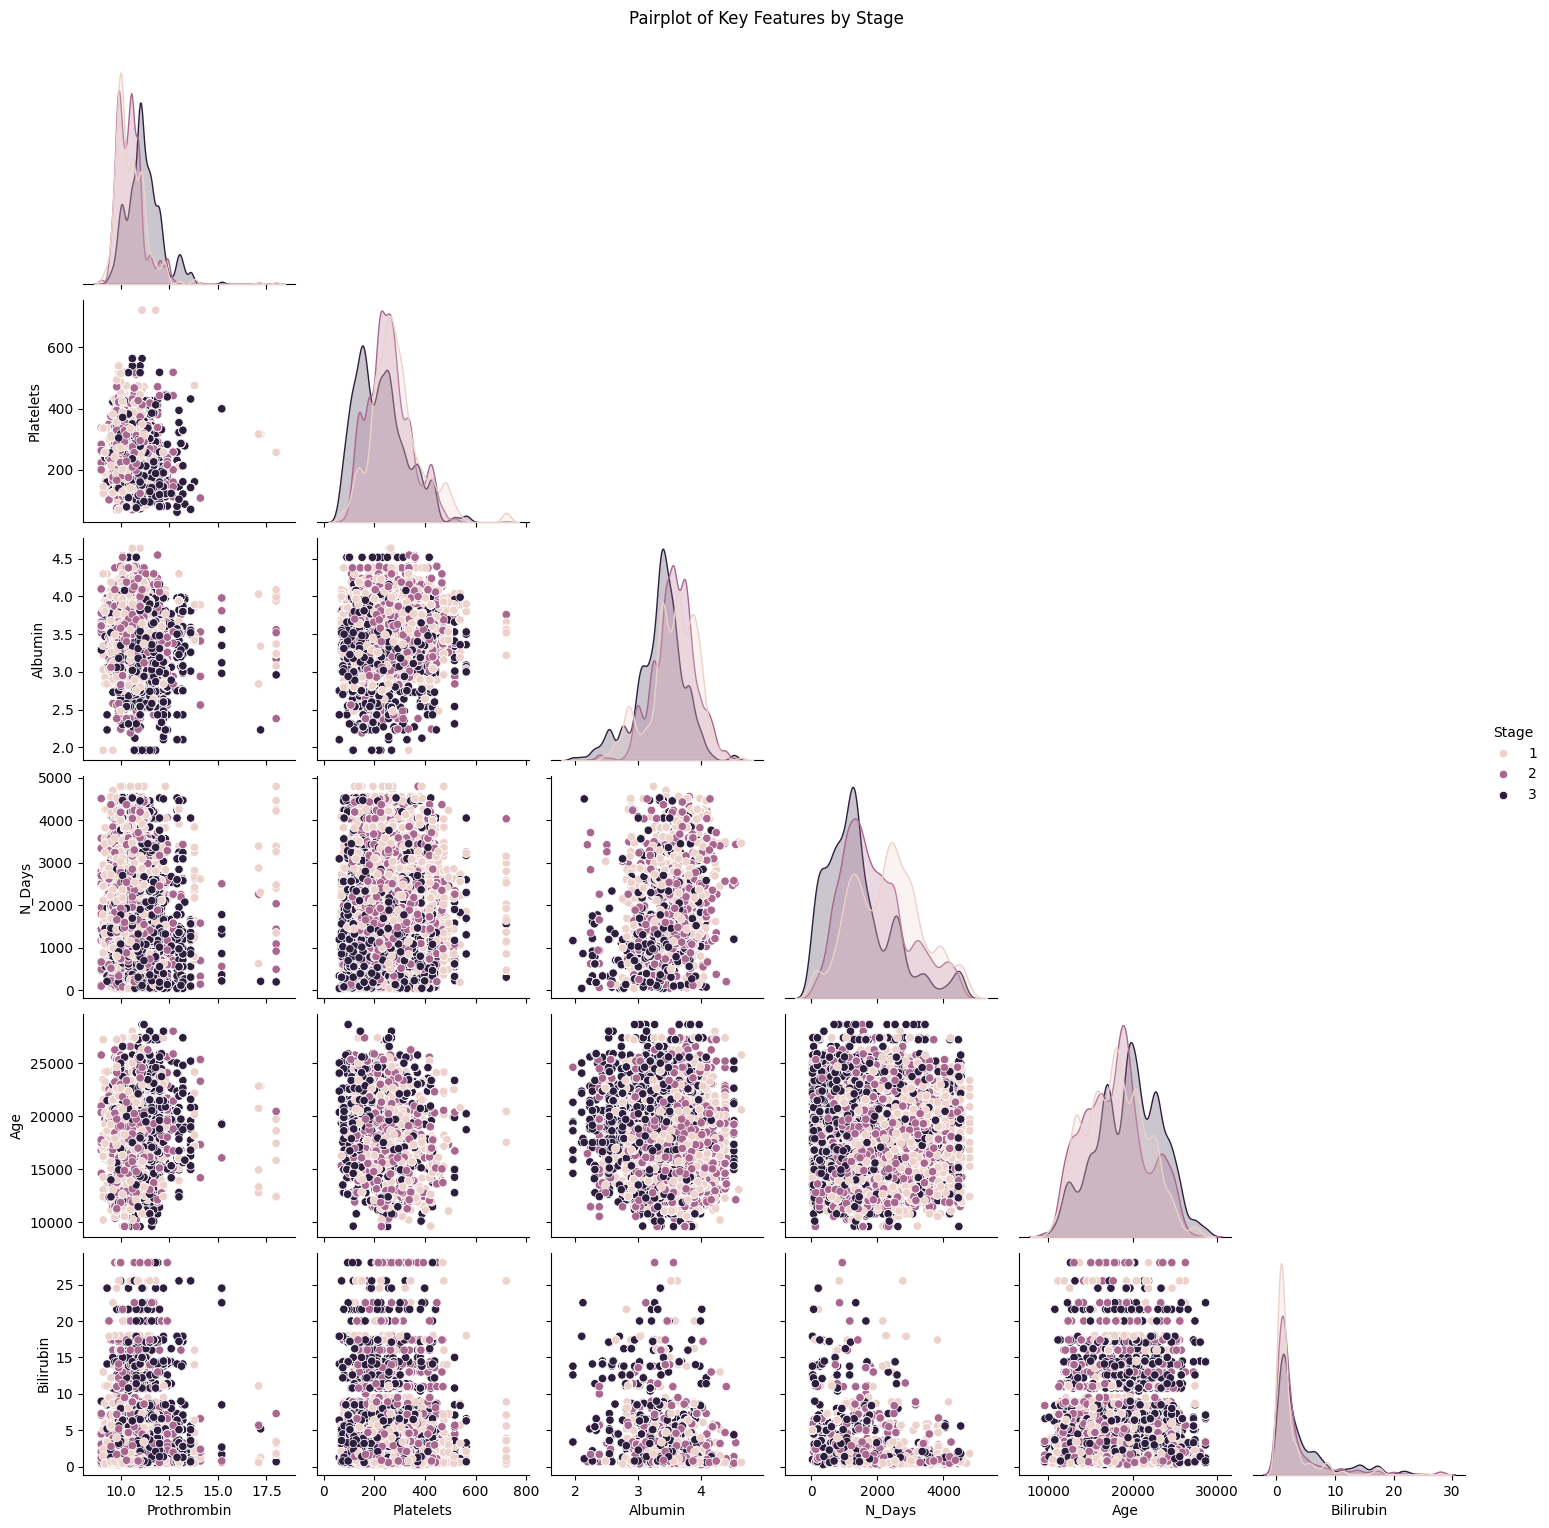

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a few important numerical features for distribution plots
features_to_plot = ['Prothrombin', 'Platelets', 'Albumin', 'N_Days', 'Age', 'Bilirubin']

# Distribution plots grouped by 'Stage'
plt.figure(figsize=(15, 12))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=feature, hue='Stage', kde=True, element='step')
    plt.title(f'Distribution of {feature} by Stage')
plt.tight_layout()
plt.show()

# Pairplot of these features colored by 'Stage'
sns.pairplot(df[features_to_plot + ['Stage']], hue='Stage', diag_kind='kde', corner=True)
plt.suptitle('Pairplot of Key Features by Stage', y=1.02)
plt.show()
